[View in Colaboratory](https://colab.research.google.com/github/shivamgoel1791/Kadenze_Image_dataset_processing/blob/master/Kadenze_celebface_dataset.ipynb)

In [2]:
!git clone https://github.com/pkmital/CADL

Cloning into 'CADL'...
remote: Counting objects: 2064, done.
remote: Total 2064 (delta 0), reused 0 (delta 0), pack-reused 2064
Receiving objects: 100% (2064/2064), 305.20 MiB | 48.09 MiB/s, done.
Resolving deltas: 100% (1027/1027), done.


In [3]:
!git clone https://github.com/shivamgoel1791/BMW_Car_dataset

Cloning into 'BMW_Car_dataset'...
remote: Counting objects: 110, done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 110 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 5.64 MiB | 25.56 MiB/s, done.


In [0]:
!mv /content/BMW_Car_dataset/ /content/CADL/session-1/

In [0]:
!git clone https://github.com/shivamgoel1791/Kadenze_Image_dataset_processing

In [0]:
mv /content/CADL/session-1/img_align_celeba/Kadenze_Image_dataset_processing/celeb_images/*.* /content/CADL/session-1/img_align_celeba

In [76]:
%pylab
plt.style.use('ggplot')
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [0]:
from libs import utils

In [79]:
mkdir img_align_celeba

mkdir: cannot create directory ‘img_align_celeba’: File exists


In [80]:
files = utils.get_celeb_files()

In [105]:
files

['img_align_celeba/000087.jpg',
 'img_align_celeba/httpmediacacheecpinimgcomxffeffbcefjpg.jpg',
 'img_align_celeba/httpwwwetonlinecomphotomadonnabdayjpg.jpg',
 'img_align_celeba/000027.jpg',
 'img_align_celeba/000095.jpg',
 'img_align_celeba/httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg',
 'img_align_celeba/httpsticketmnettmenusdbimagesajpg.jpg',
 'img_align_celeba/000011.jpg',
 'img_align_celeba/httpftqncomymusicLxZeltonjohnjpg.jpg',
 'img_align_celeba/000036.jpg',
 'img_align_celeba/000017.jpg',
 'img_align_celeba/httpwwwimpropercomimagesuploadsusercontentimagesSoroffMindyjpg.jpg',
 'img_align_celeba/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg',
 'img_align_celeba/httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg',
 'img_align_celeba/000023.jpg',
 'img_align_celeba/httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg',
 'img_align_celeba/000053.jpg',
 'img_align_celeba/httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.

In [134]:
files[1]

'img_align_celeba/httpmediacacheecpinimgcomxffeffbcefjpg.jpg'

In [0]:
img  = plt.imread(files[1])

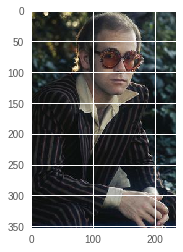

In [136]:
plt.imshow(img)

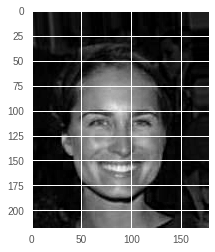

In [103]:
plt.imshow(img[:,:,0],cmap='gray')
plt.imshow(img[:,:,1],cmap='gray')
plt.imshow(img[:,:,2],cmap='gray')

In [115]:
#plt.imshow(files[0])
img = utils.get_celeb_imgs()
"""
def get_celeb_imgs():
    return [plt.imread(f_i) for f_i in get_celeb_files()]"""

'\ndef get_celeb_imgs():\n    return [plt.imread(f_i) for f_i in get_celeb_files()]'

In [0]:
??utils.get_celeb_files

In [113]:
img

[array([[[43, 39, 30],
         [33, 30, 23],
         [19, 19, 11],
         ...,
         [24, 31, 24],
         [24, 31, 24],
         [24, 31, 24]],
 
        [[43, 39, 30],
         [33, 30, 23],
         [20, 20, 12],
         ...,
         [24, 31, 24],
         [24, 31, 24],
         [24, 31, 24]],
 
        [[44, 40, 31],
         [34, 31, 24],
         [20, 20, 12],
         ...,
         [24, 31, 24],
         [24, 31, 24],
         [24, 31, 24]],
 
        ...,
 
        [[10,  6,  7],
         [10,  6,  7],
         [10,  8,  9],
         ...,
         [60, 48, 48],
         [64, 53, 59],
         [64, 53, 59]],
 
        [[ 6,  2,  3],
         [ 8,  4,  5],
         [ 9,  7,  8],
         ...,
         [50, 40, 41],
         [58, 49, 54],
         [58, 49, 54]],
 
        [[ 6,  2,  3],
         [ 8,  4,  5],
         [ 9,  7,  8],
         ...,
         [49, 40, 43],
         [48, 38, 46],
         [48, 38, 46]]], dtype=uint8), array([[[196, 183, 139],
         [214, 20

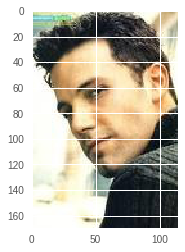

In [112]:
plt.imshow(img[90])

In [0]:
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [0]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

In [0]:
from scipy.misc import imresize

In [166]:
imgs  =  []
for file_i in files:
    img  =  plt.imread(file_i)
    square  =  imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


200


In [169]:
for i in range(len(imgs)):
  if imgs[i].shape[2] == 4:
    print (files[i])

img_align_celeba/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg


In [153]:
data = np.array(imgs)

ValueError: ignored

In [192]:
files.index('img_align_celeba/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg')

96

In [189]:
t = plt.imread('img_align_celeba/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg')
t.shape

(224, 300, 4)

In [196]:
a = imgs[96]
print (a.shape)
a = a[:,:,:3]
print (a.shape)

(64, 64, 4)
(64, 64, 3)


In [0]:
imgs[96] = a

In [0]:
data =np.array(imgs)

In [199]:
data.shape

(200, 64, 64, 3)